In [70]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import (
    confusion_matrix,
    recall_score,
    precision_score,
    accuracy_score,
    f1_score,
    ConfusionMatrixDisplay,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC



In [72]:
# Loading and exploring the dataset
churn = pd.read_csv("C:\\Users\\arehm\\Downloads\\Churn_Modelling.csv")
print(churn.head())
print(churn.tail())
print("Shape of the dataset:", churn.shape)
print("Size of the dataset:", churn.size)



   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [74]:
# Cleaning column names
churn.columns = churn.columns.str.strip().str.lower()
print("Columns:", churn.columns)



Columns: Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')


In [76]:
# Checking for missing values and duplicates
print("Missing values:\n", churn.isna().sum())
print("Duplicate CustomerIDs:\n", churn[churn.duplicated(subset=["customerid"], keep=False)])



Missing values:
 rownumber          0
customerid         0
surname            0
creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64
Duplicate CustomerIDs:
 Empty DataFrame
Columns: [rownumber, customerid, surname, creditscore, geography, gender, age, tenure, balance, numofproducts, hascrcard, isactivemember, estimatedsalary, exited]
Index: []


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        10000 non-null  int64  
 1   customerid       10000 non-null  int64  
 2   surname          10000 non-null  object 
 3   creditscore      10000 non-null  int64  
 4   geography        10000 non-null  object 
 5   gender           10000 non-null  object 
 6   age              10000 non-null  int64  
 7   tenure           10000 non-null  int64  
 8   balance          10000 non-null  float64
 9   numofproducts    10000 non-null  int64  
 10  hascrcard        10000 non-null  int64  
 11  isactivemember   10000 non-null  int64  
 12  estimatedsalary  10000 non-null  float64
 13  exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
Dataset description:
          rownumber    customerid   creditscore           a

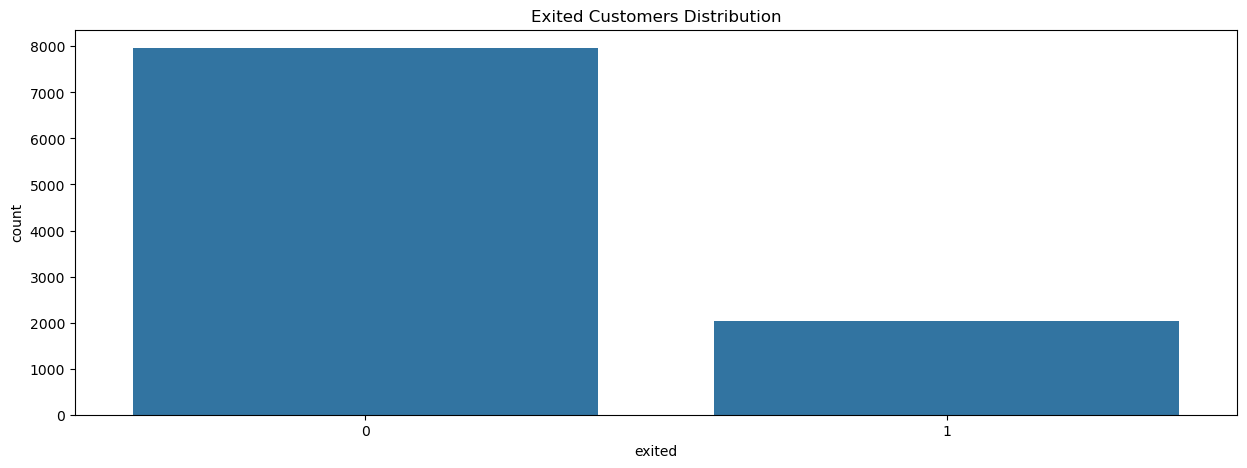

In [78]:

# Dataset information and statistics
print("Dataset info:")
churn.info()
print("Dataset description:\n", churn.describe())

# Visualizing the 'exited' column distribution
plt.figure(figsize=(15, 5))
sns.countplot(data=churn, x="exited")
plt.title("Exited Customers Distribution")
plt.show()



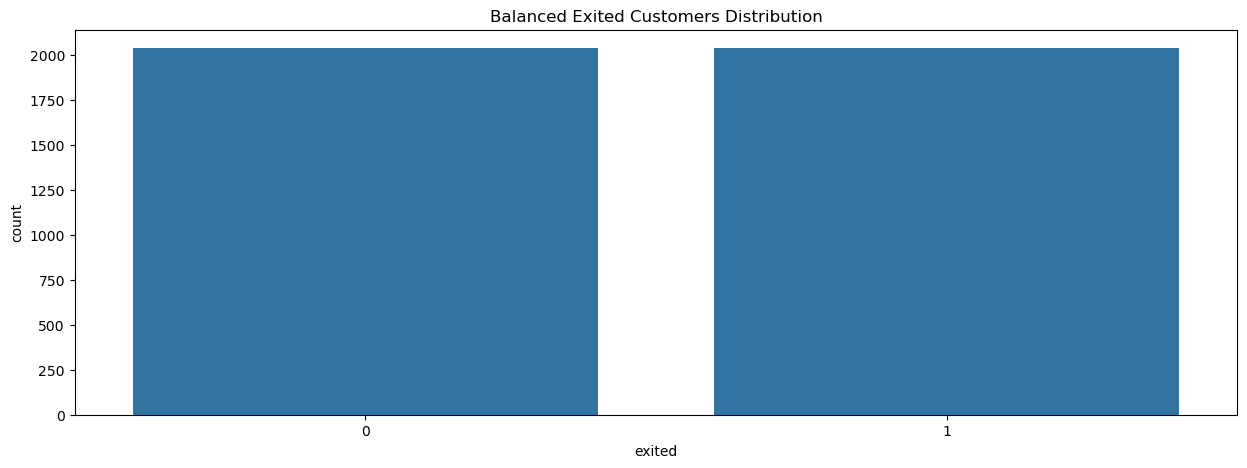

In [80]:
# Resampling the dataset to handle imbalance
churn_majority = churn[churn["exited"] == 0]
churn_minority = churn[churn["exited"] == 1]
churn_majority_downsampled = resample(
    churn_majority, n_samples=len(churn_minority), replace=False, random_state=42
)
churn_balanced = pd.concat([churn_majority_downsampled, churn_minority])

# Verifying balanced distribution
plt.figure(figsize=(15, 5))
sns.countplot(data=churn_balanced, x="exited")
plt.title("Balanced Exited Customers Distribution")
plt.show()



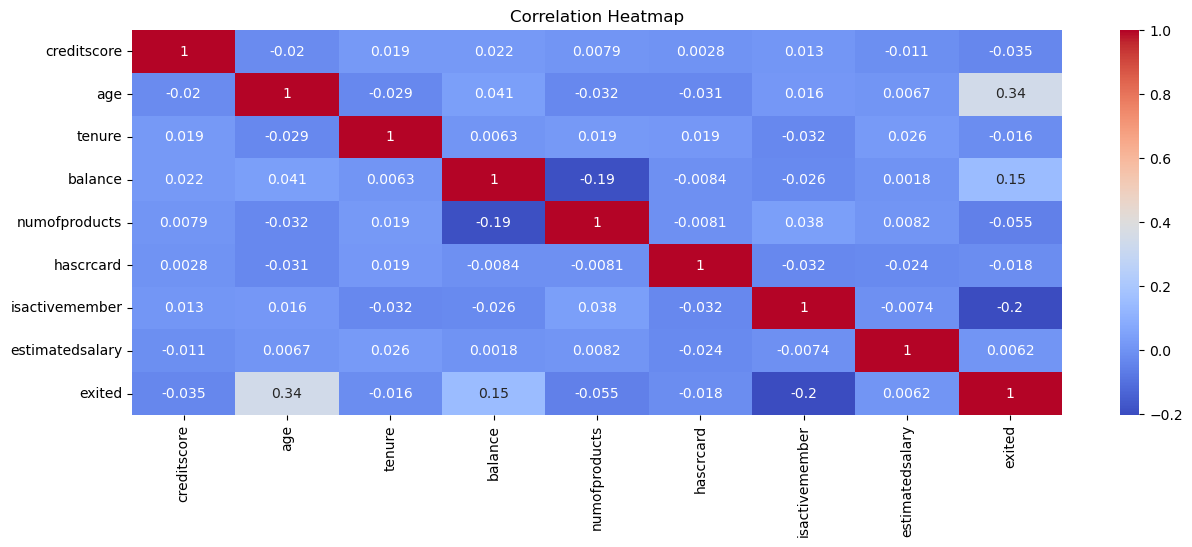

In [54]:
# Dropping unnecessary columns
churn_balanced.drop(["rownumber", "customerid", "surname", "geography", "gender"], axis=1, inplace=True)

# Correlation heatmap
plt.figure(figsize=(15, 5))
sns.heatmap(churn_balanced.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()



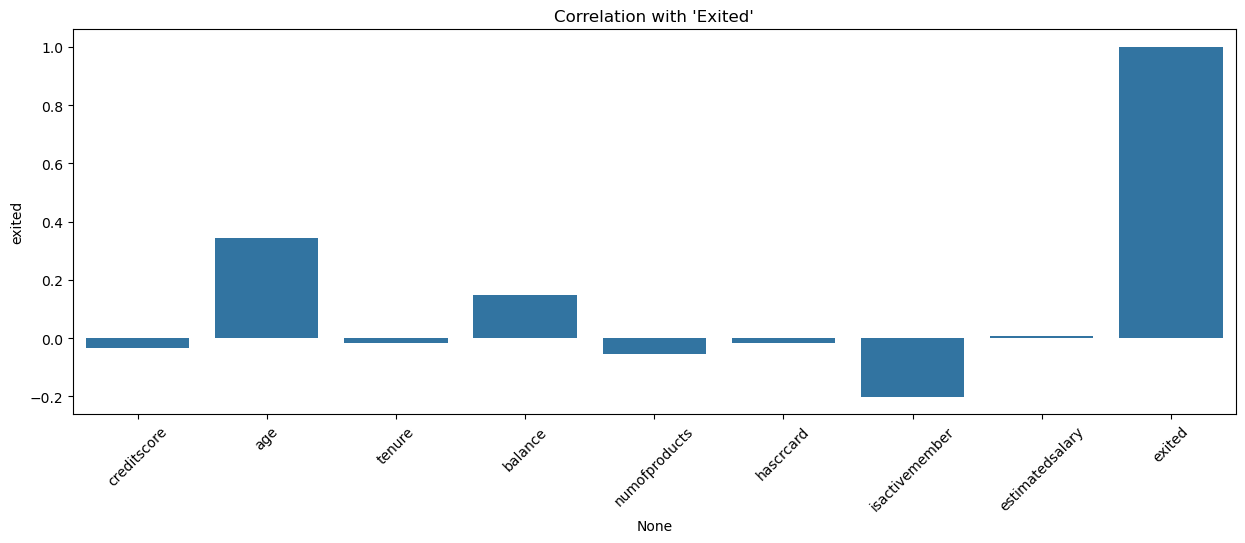

In [56]:
# Correlation of features with 'exited'
df_corr_exit = churn_balanced.corr()["exited"].to_frame()
plt.figure(figsize=(15, 5))
sns.barplot(data=df_corr_exit, x=df_corr_exit.index, y="exited")
plt.title("Correlation with 'Exited'")
plt.xticks(rotation=45)
plt.show()



In [58]:
# Splitting the dataset into training and testing sets
X = churn_balanced.drop(["exited"], axis=1)
y = churn_balanced["exited"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [60]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression with increased max_iter and scaled data
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

# Print training and testing accuracy
print("Logistic Regression Training Accuracy:", lr.score(X_train_scaled, y_train))
print("Logistic Regression Testing Accuracy:", lr.score(X_test_scaled, y_test))



Logistic Regression Training Accuracy: 0.6815152578042792
Logistic Regression Testing Accuracy: 0.7023712183156173


In [62]:
# Logistic Regression with Cross-Validation (L1 penalty)
lr_cv_l1 = LogisticRegressionCV(max_iter=500, solver="liblinear", penalty="l1", cv=3, Cs=10)
lr_cv_l1.fit(X_train, y_train)
print("Logistic Regression CV (L1) Test Accuracy:", lr_cv_l1.score(X_test, y_test))



Logistic Regression CV (L1) Test Accuracy: 0.7031888798037612


In [64]:
# K-Nearest Neighbors (KNN) with Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3, metric="euclidean")
knn.fit(X_train_scaled, y_train)
print("KNN Test Accuracy:", knn.score(X_test_scaled, y_test))



KNN Test Accuracy: 0.7195421095666394


In [66]:
# Support Vector Classifier (SVC)
svc = SVC(kernel="rbf", gamma=2, C=1)
svc.fit(X_train, y_train)
print("SVC Test Accuracy:", svc.score(X_test, y_test))



SVC Test Accuracy: 0.4766966475878986


In [68]:
# Evaluation Metrics for KNN
y_pred_knn = knn.predict(X_test_scaled)
print("KNN Precision:", precision_score(y_test, y_pred_knn))
print("KNN Recall:", recall_score(y_test, y_pred_knn))
print("KNN F1 Score:", f1_score(y_test, y_pred_knn))


KNN Precision: 0.7061855670103093
KNN Recall: 0.7049742710120068
KNN F1 Score: 0.7055793991416309
